In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [27]:
inst_SAC = pd.read_csv('inst_SAC.csv')
total_SAC = pd.read_csv('total_SAC.csv')
inst_CTRL_SAC_true = pd.read_csv('inst_CTRL_SAC_true.csv')
total_CTRL_SAC_true = pd.read_csv('total_CTRL_SAC_true.csv')
inst_CTRL_SAC_false = pd.read_csv('inst_CTRL_SAC_False.csv')
total_CTRL_SAC_false = pd.read_csv('total_CTRL_SAC_false.csv')

insts = [inst_SAC, inst_CTRL_SAC_true, inst_CTRL_SAC_false]
totals = [total_SAC, total_CTRL_SAC_true, total_CTRL_SAC_false]
labels = ['SAC', 'Parameterized CTRL-SAC', 'Standard CTRL-SAC']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

In [17]:
def compute_ma_vec(vec):
    window_width = 10
    cumsum_vec = numpy.cumsum(numpy.insert(vec.Value.to_numpy(), 0, 0)) 
    ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
    return ma_vec

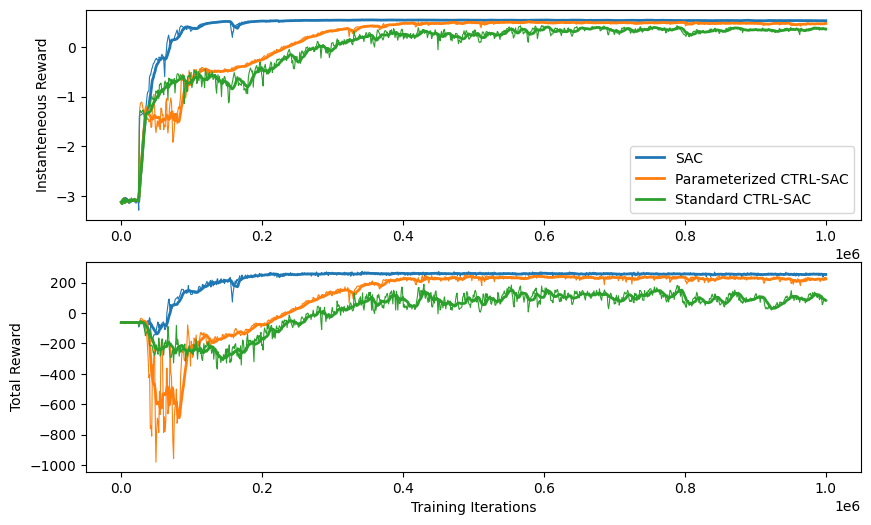

In [28]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
for i in range(3):
    data_inst = insts[i]
    data_total = totals[i]
    ax[0].plot(data_inst.Step, data_inst.Value, lw = 0.8, c=colors[i])
    ax[0].plot(data_inst.Step, numpy.concatenate((data_inst.Value[:9], compute_ma_vec(data_inst))), label = labels[i], lw = 2, c=colors[i])
    ax[1].plot(data_total.Step, data_total.Value, lw = 0.8, c=colors[i])
    ax[1].plot(data_total.Step, numpy.concatenate((data_total.Value[:9], compute_ma_vec(data_total))), label = labels[i], lw = 2, c=colors[i])

ax[0].legend()
ax[1].set_xlabel("Training Iterations")
ax[0].set_ylabel("Instanteneous Reward")
ax[1].set_ylabel("Total Reward")
fig.savefig('ctrlsac_reward_plot', dpi = 300, bbox_inches='tight')

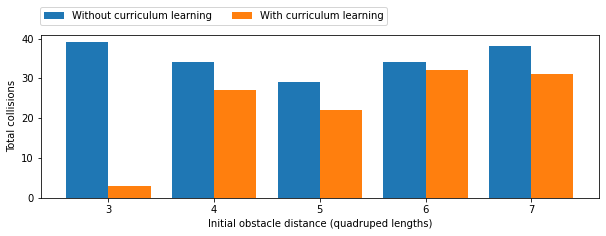

In [110]:
fig, ax = plt.subplots(figsize = (10, 3))
plt.bar(numpy.array([3, 4, 5, 6, 7]) - 0.4/2, [39, 34, 29, 34, 38], 0.4, label = "Without curriculum learning")
plt.bar(numpy.array([3, 4, 5, 6, 7]) + 0.4/2, [3, 27, 22, 32, 31], 0.4, label = "With curriculum learning")
plt.xlabel("Initial obstacle distance (quadruped lengths)")
plt.ylabel("Total collisions")
plt.legend(bbox_to_anchor=(0.63, 1.2), ncol = 2)
fig.savefig('collisions_plot', dpi = 300, bbox_inches='tight')